# Project : Lending Club Loan

Lending Club, a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. Each borrower fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower’s credit score using past historical data (and their own data science process!) and assigns an interest rate to the borrower.

Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower’s credit score, the purpose for the loan, and other information from the application.

Once an investor decides to fund a loan, the borrower then makes monthly payments back to Lending Club. Lending Club redistributes these payments to investors. This means that investors don’t have to wait until the full amount is paid off to start to see returns. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount.

Many loans aren’t completely paid off on time, however, and some borrowers default on the loan. That’s the problem we’ll be trying to address as we clean some data from Lending Club for machine learning. 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
loans_2007=pd.read_csv("lending_club_loans.csv")
loans_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN


In [41]:
loans_2007.T

,0,1,2,3,4,5,6,7,8,9,...,42528,42529,42530,42531,42532,42533,42534,42535,42536,42537
id,1077501,1077430,1077175,1076863,1075358,1075269,1069639,1072053,1071795,1071570,...,77757,74505,74323,73582,72998,72176,71623,70686,Total amount funded in policy code 1: 460296150,Total amount funded in policy code 2: 0
member_id,1.2966e+06,1.31417e+06,1.31352e+06,1.27718e+06,1.31175e+06,1.31144e+06,1.30474e+06,1.28869e+06,1.30696e+06,1.30672e+06,...,70626,74469,74301,73096,72992,70868,70735,70681,NaN,NaN
loan_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,3000,2000,6500,3500,1000,2525,6500,5000,NaN,NaN
funded_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,3000,2000,6500,3500,1000,2525,6500,5000,NaN,NaN
funded_amnt_inv,4975,2500,2400,10000,3000,5000,7000,3000,5600,5350,...,0,225,0,225,0,225,0,0,NaN,NaN
term,36 months,60 months,36 months,36 months,60 months,36 months,60 months,36 months,60 months,60 months,...,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,NaN,NaN
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%,7.90%,15.96%,18.64%,21.28%,12.69%,...,9.33%,9.96%,9.64%,10.28%,9.64%,9.33%,8.38%,7.75%,NaN,NaN
installment,162.87,59.83,84.33,339.31,67.79,156.46,170.08,109.43,152.39,121.45,...,95.86,64.5,208.66,113.39,32.11,80.69,204.84,156.11,NaN,NaN
grade,B,C,C,C,B,A,C,E,F,B,...,B,B,B,C,B,B,A,A,NaN,NaN
sub_grade,B2,C4,C5,C1,B5,A4,C5,E1,F2,B5,...,B3,B5,B4,C1,B4,B3,A5,A3,NaN,NaN


In [42]:
loans_2007.shape

(42538, 115)

In [43]:
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(86), object(29)
memory usage: 37.3+ MB


In [44]:
loans_2007.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,0.0,41170.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,NaN,0.045227,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,NaN,0.208737,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [45]:
loans_2007["url"].head(2)

0    https://lendingclub.com/browse/loanDetail.acti...
1    https://lendingclub.com/browse/loanDetail.acti...
Name: url, dtype: object

In [46]:
loans_2007["desc"].head(2)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
Name: desc, dtype: object

### Remove the ‘desc’ column: it contains a long text explanation for the loan that we won’t need.
### Remove the ‘url’ column: it contains a link to each on Lending Club which can only be accessed with an investor account.

In [47]:
loans_2007.drop(["url","desc"],axis=1,inplace=True)

In [48]:
loans_2007.shape

(42538, 113)

In [49]:
loans_2007.isnull().sum()

id                                    0
member_id                             3
loan_amnt                             3
funded_amnt                           3
funded_amnt_inv                       3
term                                  3
int_rate                              3
installment                           3
grade                                 3
sub_grade                             3
emp_title                          2629
emp_length                         1115
home_ownership                        3
annual_inc                            7
verification_status                   3
issue_d                               3
loan_status                           3
pymnt_plan                            3
purpose                               3
title                                16
zip_code                              3
addr_state                            3
dti                                   3
delinq_2yrs                          32
earliest_cr_line                     32


### Removing all columns with more than 50% missing values: This will allow us to work faster (and our data set is large enough that it will still be meaningful without them.

In [50]:
half=len(loans_2007)/2
loans_2007=loans_2007.dropna(thresh=half,axis=1)

In [51]:
loans_2007.shape

(42538, 56)

# Step 2: Narrowing Down Our Columns for Cleaning

In [52]:
data_dictionary = pd.read_csv('LCDataDictionary.csv')

In [53]:
data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [54]:
data_dictionary.shape

(117, 2)

In [55]:
print(data_dictionary.columns.tolist())

['LoanStatNew', 'Description']


In [56]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew':'name', 'Description': 'description'})

In [57]:
data_dictionary

,name,description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


##### Now join the first row of loans_2007 to the data_dictionary DataFrame to give us a preview DataFrame with the following columns:

name — contains the column names of loans_2007.

dtypes — contains the data types of the loans_2007 columns.

first value — contains the values of loans_2007 first row.

description — explains what each column in loans_2007 represents.

In [59]:
loans_2007_dtypes

,dtypes
id,object
member_id,float64
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object


In [60]:
=loans_2007_dtypes= loans_2007_dtypes.reset_index()

In [61]:
loans_2007_dtypes

,index,dtypes
0,id,object
1,member_id,float64
2,loan_amnt,float64
3,funded_amnt,float64
4,funded_amnt_inv,float64
5,term,object
6,int_rate,object
7,installment,float64
8,grade,object
9,sub_grade,object


In [62]:
loans_2007_dtypes['name'] = loans_2007_dtypes['index']

In [63]:
loans_2007_dtypes

,index,dtypes,name
0,id,object,id
1,member_id,float64,member_id
2,loan_amnt,float64,loan_amnt
3,funded_amnt,float64,funded_amnt
4,funded_amnt_inv,float64,funded_amnt_inv
5,term,object,term
6,int_rate,object,int_rate
7,installment,float64,installment
8,grade,object,grade
9,sub_grade,object,sub_grade


In [64]:
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]

In [65]:
loans_2007_dtypes

,name,dtypes
0,id,object
1,member_id,float64
2,loan_amnt,float64
3,funded_amnt,float64
4,funded_amnt_inv,float64
5,term,object
6,int_rate,object
7,installment,float64
8,grade,object
9,sub_grade,object


In [66]:
loans_2007_dtypes['first value'] = loans_2007.loc[0].values

In [67]:
loans_2007_dtypes

,name,dtypes,first value
0,id,object,1077501
1,member_id,float64,1.2966e+06
2,loan_amnt,float64,5000
3,funded_amnt,float64,5000
4,funded_amnt_inv,float64,4975
5,term,object,36 months
6,int_rate,object,10.65%
7,installment,float64,162.87
8,grade,object,B
9,sub_grade,object,B2


In [68]:
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

In [69]:
preview.head()

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975,The total amount committed by investors for th...


# First Group Of Columns

In [70]:
preview[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975,The total amount committed by investors for th...
5,term,object,36 months,The number of payments on the loan. Values are...
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if th...
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


#### After analyzing the columns and considering the model we’re trying to build, we can conclude that the following features can be removed:

id — randomly generated field by LendingClub for unique identification purposes only.

member_id — also randomly generated field by LendingClub for identification purposes only.

funded_amnt — leaks information from the future (after the loan is already started to be funded).

funded_amnt_inv — also leaks data from the future.

sub_grade — contains redundant information that is already in the grade column (more below).

int_rate — also included within the grade column.

emp_title — requires other data and a lot of processing to become potentially useful

issued_d — leaks data from the future.

In [71]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
'int_rate','sub_grade','emp_title','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)

# Second Group Of Columns

In [72]:
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided b...
21,addr_state,object,AZ,The state provided by the borrower in the loan...
22,dti,float64,27.65,A ratio calculated using the borrower’s total ...
23,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of ...
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported cre...
25,fico_range_low,float64,735,The lower boundary range the borrower’s FICO a...
26,fico_range_high,float64,739,The upper boundary range the borrower’s FICO a...
27,inq_last_6mths,float64,1,The number of inquiries in past 6 months (excl...
28,open_acc,float64,3,The number of open credit lines in the borrowe...


In [73]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

# Third Group Of Columns

In [74]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0,Late fees received to date
41,recoveries,float64,0,post charge off gross recovery
42,collection_recovery_fee,float64,0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for thi...
46,last_fico_range_high,float64,744,The upper boundary range the borrower’s last F...
47,last_fico_range_low,float64,740,The lower boundary range the borrower’s last F...


In [75]:
drop_cols = ['total_rec_prncp','total_rec_int',
'total_rec_late_fee','recoveries',
'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

In [76]:
loans_2007.shape

(42538, 36)

# Investigating FICO Score Columns

In [39]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619.]


In [40]:
fico_columns = ['fico_range_high','fico_range_low']
print(loans_2007.shape[0])

42538


In [41]:
loans_2007.dropna(subset=fico_columns,inplace=True)
print(loans_2007.shape[0])

42535


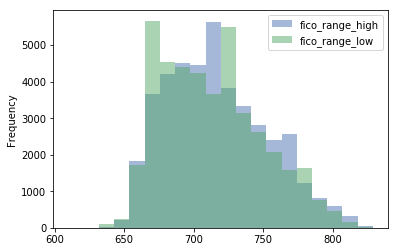

In [42]:
plt.style.use('seaborn-deep')
loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20)

### create a column for the average of fico_range_low and fico_range_high columns and name it fico_average. Note that this is not the average FICO score for each borrower, but rather an average of the high and low range that we know the borrower is in.

In [43]:
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low']) / 2


In [44]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


In [45]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.shape

(42535, 33)

# Decide On A Target Column

In [46]:
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


In [47]:
loans_2007["loan_status"].value_counts()


Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [48]:
meaning = [
"Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is up to date on current payments.",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]

In [49]:
status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values

In [50]:
status

Index(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Current',
       'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)',
       'Default'],
      dtype='object')

In [51]:
count

array([33586,  5653,  1988,   761,   513,    16,    12,     5,     1],
      dtype=int64)

In [52]:
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]

In [53]:
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable...
2,Does not meet the credit policy. Status:Fully ...,1988,"While the loan was paid off, the loan applicat..."
3,Does not meet the credit policy. Status:Charge...,761,"While the loan was charged off, the loan appli..."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace pe...
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late ...
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late o...
8,Default,1,Loan is defaulted on and no payment has been m...


In [54]:
loans_2007 = loans_2007[(loans_2007["loan_status"] == "Fully Paid") | (loans_2007["loan_status"] == "Charged Off")]

In [55]:
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}

In [56]:
loans_2007 = loans_2007.replace(mapping_dictionary)

In [57]:
loans_2007["loan_status"].value_counts()

1    33586
0     5653
Name: loan_status, dtype: int64

In [58]:
loans_2007.shape

(39239, 33)

# Visualizing the Target Column Outcomes

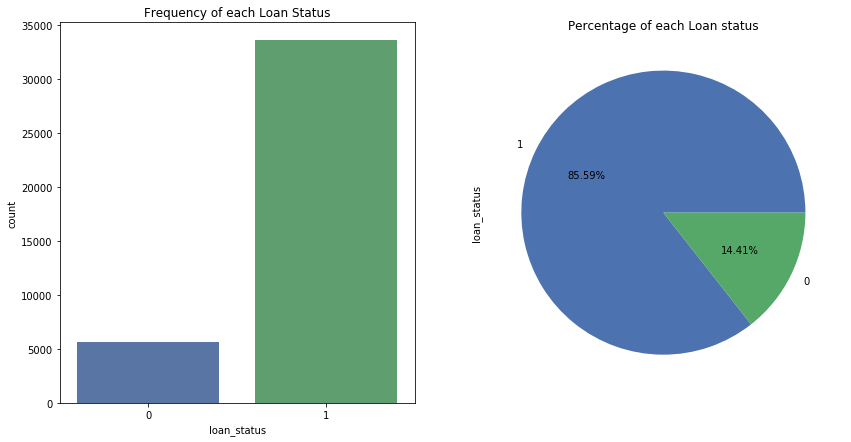

In [59]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans_2007,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans_2007.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

These plots indicate that a significant number of borrowers in our data set paid off their loan — 85.62% of loan borrowers paid off amount borrowed, while 14.38% unfortunately defaulted. It is these ‘defaulters’ that we’re more interested identifying, since for the purposes of our model we’re trying to find a way to maximize investment returns.

# Remove Columns with only One Value

Let’s look for any columns that contain only one unique value and remove them. These columns won’t be useful for the model since they don’t add any information to each loan application. 

In [60]:
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]

In [61]:
loans_2007.shape

(39239, 25)

#  Let’s find and drop any columns with unique values that appear fewer than four times:

Again, there may be some columns with more than one unique value, but one value that has insignificant frequency in the data set. Let’s find and drop any columns with unique values that appear fewer than four times:

In [62]:
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())


 36 months    29096
 60 months    10143
Name: term, dtype: int64
Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64
1    33586
0     5653
Name: loan_status, dtype: int64
False    39238
True         1
Name: pymnt_plan, dtype: int64


In [63]:
loans_2007.shape

(39239, 25)

In [64]:
loans_2007["pymnt_plan"].value_counts()

False    39238
True         1
Name: pymnt_plan, dtype: int64

In [65]:
loans_2007.T

,0,1,2,3,5,6,7,8,9,10,...,39776,39777,39778,39779,39780,39781,39782,39783,39784,39785
loan_amnt,5000,2500,2400,10000,5000,7000,3000,5600,5375,6500,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
term,36 months,60 months,36 months,36 months,36 months,60 months,36 months,60 months,60 months,60 months,...,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months
installment,162.87,59.83,84.33,339.31,156.46,170.08,109.43,152.39,121.45,153.45,...,159.77,161.25,164.23,155.38,158.3,78.42,275.38,156.84,155.38,255.43
grade,B,C,C,C,A,C,E,F,B,C,...,B,B,C,A,B,A,C,A,A,E
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years,8 years,9 years,4 years,< 1 year,5 years,...,2 years,4 years,< 1 year,1 year,5 years,4 years,3 years,< 1 year,< 1 year,< 1 year
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT,OWN,...,MORTGAGE,MORTGAGE,OWN,OWN,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE,OWN
annual_inc,24000,30000,12252,49200,36000,47004,48000,40000,15000,72000,...,180000,48000,80000,85000,75000,110000,18000,100000,200000,22000
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified,Not Verified,Source Verified,Source Verified,Verified,Not Verified,...,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified
loan_status,1,0,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
pymnt_plan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
loans_2007 = loans_2007.drop('pymnt_plan', axis=1)

In [67]:
print("We've been able to reduce the features to => {}".format(loans_2007.shape[1]))

We've been able to reduce the features to => 24


In [68]:
loans_2007.to_csv("processed_dataloans_2007.csv",index=False)

# Preparing the Features for Machine Learning

 We’ll focus on handling missing values, converting categorical columns to numeric columns and removing any other extraneous columns.

In [69]:
filtered_loans = pd.read_csv('processed_dataloans_2007.csv')
filtered_loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,...,Jan-1985,1.0,3.0,0.0,13648.0,0.837,9.0,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,...,Apr-1999,5.0,3.0,0.0,1687.0,0.094,4.0,Sep-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,...,Nov-2001,2.0,2.0,0.0,2956.0,0.985,10.0,Sep-2016,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,...,Feb-1996,1.0,10.0,0.0,5598.0,0.210,37.0,Apr-2016,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,...,Nov-2004,3.0,9.0,0.0,7963.0,0.283,12.0,Jan-2016,0.0,732.0


In [70]:
filtered_loans.T

,0,1,2,3,4,5,6,7,8,9,...,39229,39230,39231,39232,39233,39234,39235,39236,39237,39238
loan_amnt,5000,2500,2400,10000,5000,7000,3000,5600,5375,6500,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
term,36 months,60 months,36 months,36 months,36 months,60 months,36 months,60 months,60 months,60 months,...,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months
installment,162.87,59.83,84.33,339.31,156.46,170.08,109.43,152.39,121.45,153.45,...,159.77,161.25,164.23,155.38,158.3,78.42,275.38,156.84,155.38,255.43
grade,B,C,C,C,A,C,E,F,B,C,...,B,B,C,A,B,A,C,A,A,E
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years,8 years,9 years,4 years,< 1 year,5 years,...,2 years,4 years,< 1 year,1 year,5 years,4 years,3 years,< 1 year,< 1 year,< 1 year
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT,OWN,...,MORTGAGE,MORTGAGE,OWN,OWN,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE,OWN
annual_inc,24000,30000,12252,49200,36000,47004,48000,40000,15000,72000,...,180000,48000,80000,85000,75000,110000,18000,100000,200000,22000
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified,Not Verified,Source Verified,Source Verified,Verified,Not Verified,...,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified
loan_status,1,0,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
purpose,credit_card,car,small_business,other,wedding,debt_consolidation,car,small_business,other,debt_consolidation,...,home_improvement,debt_consolidation,credit_card,credit_card,credit_card,home_improvement,credit_card,debt_consolidation,other,debt_consolidation


In [71]:
filtered_loans.shape

(39239, 24)

# Handle Missing Values

In [72]:
null_counts = filtered_loans.isnull().sum()

In [73]:
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
fico_average               0
dtype: int64


In [74]:
filtered_loans["emp_length"].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4      3 years
Name: emp_length, dtype: object

In [75]:
filtered_loans = filtered_loans.drop("pub_rec_bankruptcies",axis=1)
filtered_loans = filtered_loans.dropna()

# Investigate Categorical Columns

In [76]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))


Data types and their frequency
float64    12
object     10
int64       1
dtype: int64


In [77]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


In [78]:
cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 

grade :
B    11545
A     9675
C     7801
D     5086
E     2715
F      993
G      308
Name: grade, dtype: int64 

verification_status :
Not Verified       16391
Verified           12070
Source Verified     9662
Name: verification_status, dtype: int64 

emp_length :
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: emp_length, dtype: int64 

term :
 36 months    28234
 60 months     9889
Name: term, dtype: int64 

addr_state :
CA    6833
NY    3657
FL    2741
TX    2639
NJ    1802
IL    1476
PA    1460
VA    1359
GA    1340
MA    1292
OH    1167
MD    1020
AZ     819
WA     796
CO     755
NC     747
CT     719
MI     684
MO     653
MN     586
NV     473
SC     461
WI     433
OR     427
AL     42

In [79]:
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    17965
credit_card            4944
other                  3764
home_improvement       2852
major_purchase         2105
small_business         1749
car                    1483
wedding                 927
medical                 663
moving                  556
house                   359
vacation                349
educational             312
renewable_energy         95
Name: purpose, dtype: int64 

Unique Values in column: title

Debt Consolidation                                                                 2102
Debt Consolidation Loan                                                            1635
Personal Loan                                                                       632
Consolidation                                                                       495
debt consolidation                                                                  476
Credit Card Consolidation                                               

In [80]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)

# Convert Categorical Columns to Numeric Features

In [81]:
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}


In [82]:
filtered_loans = filtered_loans.replace(mapping_dict)
filtered_loans[['emp_length','grade']].head()

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,3,1


In [83]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]

In [84]:
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])

In [85]:
filtered_loans = pd.concat([filtered_loans, dummy_df], axis=1)

In [86]:
filtered_loans.T

,0,1,2,3,4,5,6,7,8,9,...,39229,39230,39231,39232,39233,39234,39235,39236,39237,39238
loan_amnt,5000,2500,2400,10000,5000,7000,3000,5600,5375,6500,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
term,36 months,60 months,36 months,36 months,36 months,60 months,36 months,60 months,60 months,60 months,...,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months,36 months
installment,162.87,59.83,84.33,339.31,156.46,170.08,109.43,152.39,121.45,153.45,...,159.77,161.25,164.23,155.38,158.3,78.42,275.38,156.84,155.38,255.43
grade,2,3,3,3,1,3,5,6,2,3,...,2,2,3,1,2,1,3,1,1,5
emp_length,10,0,10,10,3,8,9,4,0,5,...,2,4,0,1,5,4,3,0,0,0
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT,OWN,...,MORTGAGE,MORTGAGE,OWN,OWN,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE,OWN
annual_inc,24000,30000,12252,49200,36000,47004,48000,40000,15000,72000,...,180000,48000,80000,85000,75000,110000,18000,100000,200000,22000
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified,Not Verified,Source Verified,Source Verified,Verified,Not Verified,...,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified,Not Verified
loan_status,1,0,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
purpose,credit_card,car,small_business,other,wedding,debt_consolidation,car,small_business,other,debt_consolidation,...,home_improvement,debt_consolidation,credit_card,credit_card,credit_card,home_improvement,credit_card,debt_consolidation,other,debt_consolidation


In [87]:
filtered_loans = filtered_loans.drop(nominal_columns, axis=1)

In [88]:
filtered_loans.shape

(38123, 39)

In [89]:
filtered_loans.isnull().sum()

loan_amnt                              0
installment                            0
grade                                  0
emp_length                             0
annual_inc                             0
loan_status                            0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
fico_average                           0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_car                            0
purpose_credit_c

In [90]:
filtered_loans.T

,0,1,2,3,4,5,6,7,8,9,...,39229,39230,39231,39232,39233,39234,39235,39236,39237,39238
loan_amnt,5000,2500,2400,10000,5000,7000,3000,5600,5375,6500,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
installment,162.87,59.83,84.33,339.31,156.46,170.08,109.43,152.39,121.45,153.45,...,159.77,161.25,164.23,155.38,158.3,78.42,275.38,156.84,155.38,255.43
grade,2,3,3,3,1,3,5,6,2,3,...,2,2,3,1,2,1,3,1,1,5
emp_length,10,0,10,10,3,8,9,4,0,5,...,2,4,0,1,5,4,3,0,0,0
annual_inc,24000,30000,12252,49200,36000,47004,48000,40000,15000,72000,...,180000,48000,80000,85000,75000,110000,18000,100000,200000,22000
loan_status,1,0,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
dti,27.65,1,8.72,20,11.2,23.51,5.35,5.55,18.08,16.12,...,11.93,8.03,1.21,0.31,15.55,11.33,6.4,2.3,3.72,14.29
delinq_2yrs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
inq_last_6mths,1,5,2,1,3,1,2,2,0,2,...,1,1,3,0,0,0,1,0,0,0
open_acc,3,3,2,10,9,7,4,11,2,14,...,16,6,15,7,10,13,6,11,17,7


In [91]:
filtered_loans.shape

(38123, 39)

In [92]:
filtered_loans.to_csv("Finalprocessed_loans_20071.csv",index=False)

# Use the above csv file for visualization in Python and Tableau

# Now we can start building the model